In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Preprocess the data
df = df.dropna()
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
df = pd.get_dummies(df, drop_first=True)

# Separate features and label
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Training the model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = model.score(x_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")


Model accuracy: 0.89


Confusion Matrix:
 [[121   3]
 [ 13  10]]
true: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0]
pred: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


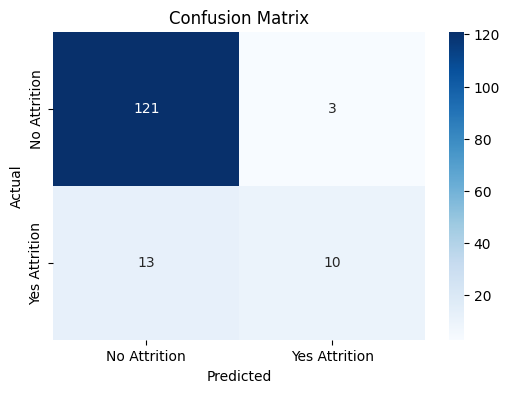

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
      # 0  |   # 1
# 0   TN   |   FP 
# 1   FN   |   TP

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm) 

print ("true:", y_test[0:25].values)
print ("pred:", y_pred[0:25])
# output:
# true: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0]
# pred: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
# TP y_pred = 1 and y_test = 1
# TN y_pred = 0 and y_test = 0
# FP y_pred = 1 and y_test = 0
# FN y_pred = 0 and y_test = 1

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Yes Attrition'], yticklabels=['No Attrition', 'Yes Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [23]:
# Calculate metrics from confusion matrix #

# Extract values
TN, FP, FN, TP = cm.ravel()  # Unpack confusion matrix values

# Calculate metrics
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

# OR use classification_report 
from sklearn.metrics import classification_report
print("\nClassification Report:\n","\n", classification_report(y_test, y_pred, target_names=['No Attrition', 'Yes Attrition']))

Precision: 0.77
Recall: 0.43
F1 Score: 0.56

Classification Report:
 
                precision    recall  f1-score   support

 No Attrition       0.90      0.98      0.94       124
Yes Attrition       0.77      0.43      0.56        23

     accuracy                           0.89       147
    macro avg       0.84      0.71      0.75       147
 weighted avg       0.88      0.89      0.88       147

